# Cristiano Ronaldo Project

Libraries are imported to the project:

In [1]:
from PIL import Image as img
from PIL import ImageDraw,ImageFont
from PIL import ImageEnhance

Now my `image` is imported to the project and converted into *RBG* then splited into that channels :

In [2]:
image = img.open("Image_2.png").convert("RGBA")
[r, b, g, a] = image.split()

Desired intensities are applied to the *RGB* channels:

In [3]:
images = []
intensities = [0.1, 0.5, 0.9]
for im in [r, b, g]:
    enhancer = ImageEnhance.Brightness(im)
    for index in intensities:
        images.append(enhancer.enhance(index))

Different images are merged together and created a single image:

In [4]:
contact_sheet = img.new(image.mode, (image.width * 3, image.height * 3))
x = 0
y = 0
font = ImageFont.truetype("arial.ttf", 100)

for i in range(len(images)):

    if i < 3:
        meged = img.merge(image.mode, [images[i], b, g, a])
        draw = ImageDraw.Draw(meged)
        draw.text((100,100),f"Channel {i//3} intensity {intensities[i%3]}",fill="red",font=font)
    elif (i < 6) and (i > 2):
        meged = img.merge(image.mode, [r, images[i], g, a])
        draw = ImageDraw.Draw(meged)
        draw.text((100,100),f"Channel {i//3} intensity {intensities[i%3]}",fill="red",font=font)
    elif (i < 9) and (i > 5):
        meged = img.merge(image.mode, [r, b, images[i], a])
        draw = ImageDraw.Draw(meged)
        draw.text((100,100),f"Channel {i//3} intensity {intensities[i%3]}",fill="red",font=font)

    contact_sheet.paste(meged, (x, y))

    if x + image.width == contact_sheet.width:
        x = 0
        y += image.width
    else:
        x += image.width


And finally this is result:

In [5]:
contact_sheet = contact_sheet.resize((1600, 900))
contact_sheet.show()

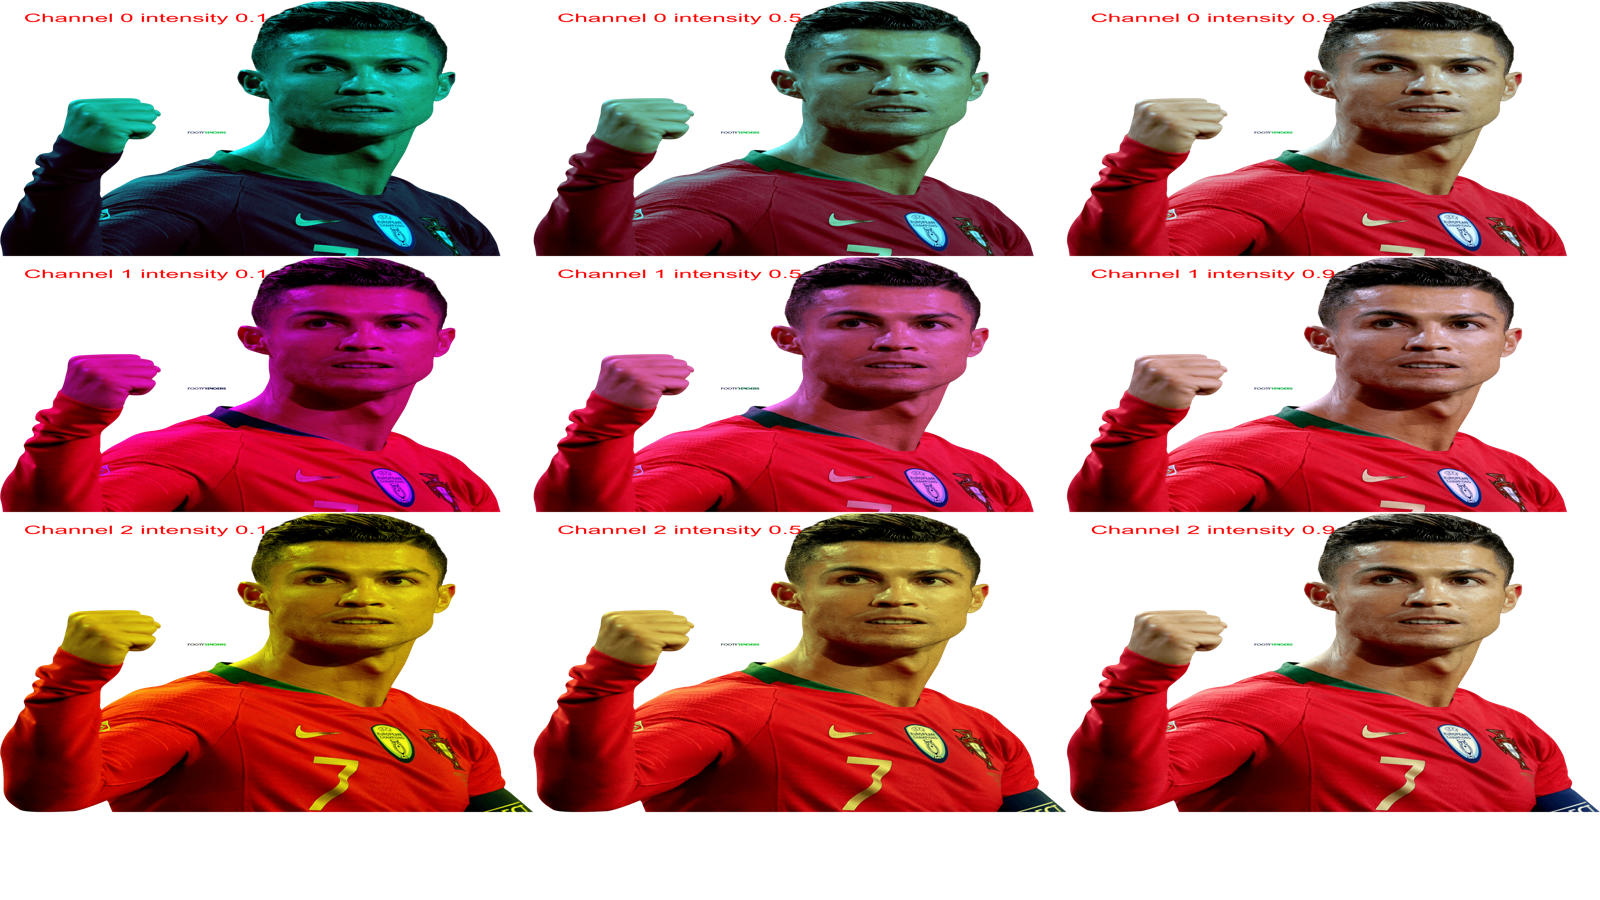